In [1]:
import os
import torch
from flows import PlanarFlow
import matplotlib.pyplot as plt
import numpy as np
from NormVAE import FlowVAE, BernoulliDecoder, LogitNormalDecoder
from train import test

In [18]:
# Hyperprameters
dataset_name = 'mnist'
img_size = [1, 28 ,28]
batch_size = 256
num_flow = 80
dim_z = 40
dim_h = 256
load_epoch = 50
load_path = os.path.join(f'{os.getcwd()}/checkpoint', f'{dataset_name}/{num_flow}')
beta = 1

In [19]:
# if dataset_name == 'mnist':
#     decoder = BernoulliDecoder(img_size, dim_z, dim_h)
# elif dataset_name == 'cifar10':
#     decoder = LogitNormalDecoder(img_size, dim_z, dim_h)
decoder = BernoulliDecoder(img_size, dim_z, dim_h)
flows = [PlanarFlow(dim_z) for _ in range(num_flow)]
model = FlowVAE(img_size, dim_h, dim_z, decoder, flows)
model.load_model(load_path, load_epoch)

Load Model from /home/yedanqi/variational-inference/checkpoint/mnist/80


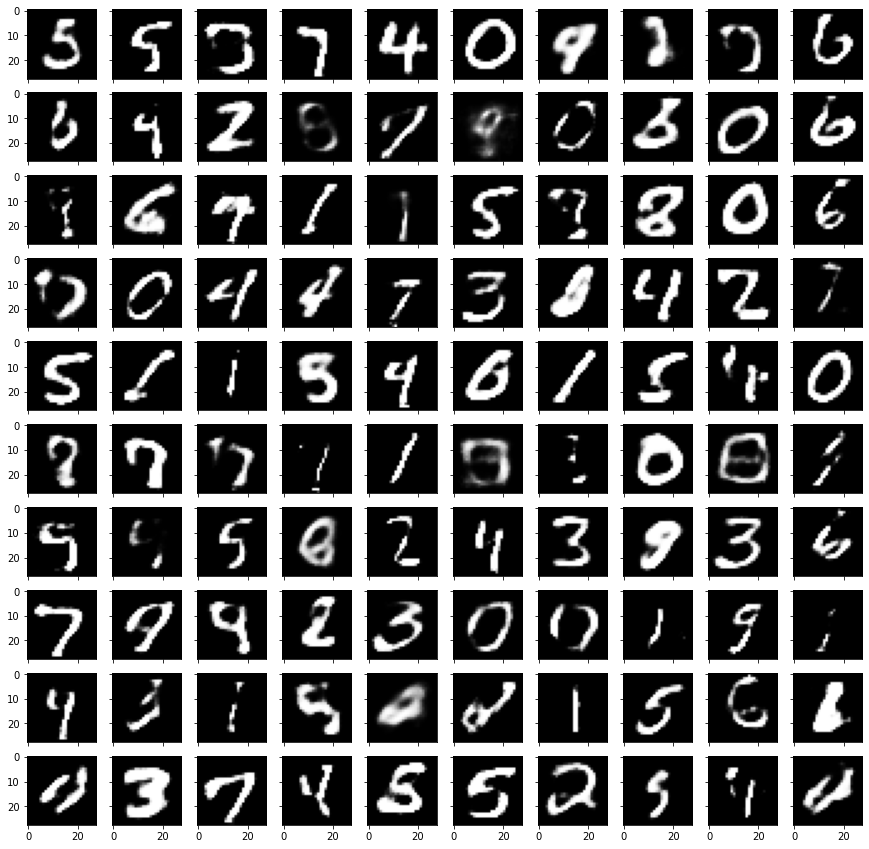

In [11]:
# Plotting the mnist or cifar image
rows=10
cols=10
fig, ax = plt.subplots(rows, cols, figsize=(15,15), sharex='col', sharey='row')
counter=0
for i in range(rows*cols):
    q, mod = divmod(i,cols)
    if dataset_name == 'mnist':
        ax[q][mod].imshow(model.sample_img()[0][0], cmap='gray')
    else: # cifar10 dataset 
        img = model.sample_img().squeeze().permute([1,2,0]).numpy()*255
        img = img.astype(np.uint8)
        ax[q][mod].imshow(img)
plt.show()

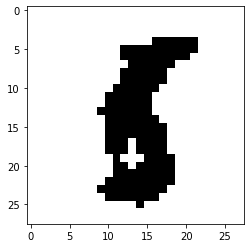

In [12]:
img = 1- (torch.sigmoid(model.sample_img())>0.5).int().squeeze().numpy()
plt.imshow(img, cmap=plt.cm.gray)

In [ ]:
# Plot function for Figure 4
def plot_line_graph_(x_val, y_val, title=None, x_label=None, y_label=None, vertical_arr=None):
    min_ = np.min(y_val)
    yratio = np.max(y_val) - np.min(y_val)
    if vertical_arr is not None:
        for i,x in enumerate(x_val):
            if len(vertical_arr) > i:
                ymin = (1.0 * (vertical_arr[i][0]-min_)/yratio)
                ymax = (1.0 * (vertical_arr[i][1]-min_)/yratio)
                # ymin and ymax is in percentage
                plt.axvline(x=x, ymin=ymin, ymax=ymax, linewidth=1, color='blue')
    plt.plot(x_val, y_val, marker='s')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

In [20]:
# Grab the log likelihood values
load_epoch = 40
flow_lengths = [2, 10, 20, 40, 80]
recon_loss = []
kl_loss = []
var_bound = []

for nflow in flow_lengths:
    flows = [PlanarFlow(dim_z) for _ in range(nflow)]
    model = FlowVAE(img_size, dim_h, dim_z, decoder, flows)
    recon, kl = test(model, dataset_name, nflow, batch_size, load_epoch)
    recon_loss.append(recon)
    kl_loss.append(kl)
    var_bound.append(-1*(-kl + recon))

Files already downloaded and verified
Load Model from checkpoint/mnist/2


100%|███████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 20.49it/s]


Files already downloaded and verified
Load Model from checkpoint/mnist/10


100%|███████████████████████████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 19.78it/s]


Files already downloaded and verified
Load Model from checkpoint/mnist/20


100%|███████████████████████████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 17.24it/s]


Files already downloaded and verified
Load Model from checkpoint/mnist/40


100%|███████████████████████████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 14.51it/s]


Files already downloaded and verified
Load Model from checkpoint/mnist/80


100%|███████████████████████████████████████████████████████████████████████████████████| 40/40 [00:03<00:00, 11.13it/s]


In [ ]:
label = 'KL on Mnist'
x_label = 'Flow Length'
y_label = 'KL(q||p)'

plot_line_graph_(flow_lengths, kl_loss, title=label, x_label=x_label, y_label=y_label)

In [ ]:
label = 'F(x) on Mnist'
x_label = 'Flow Length'
y_label = 'Variational bound'

plot_line_graph_(flow_lengths, var_bound, x_label=x_label, y_label=y_label)

In [3]:
# Cifar10 Dataset
dataset_name = 'cifar10'
img_size = [3, 32, 32]
batch_size = 256
num_flow = 80
dim_z = 40
dim_h = 256
load_epoch = 50
load_path = os.path.join(f'{os.getcwd()}/checkpoint', f'{dataset_name}/{num_flow}')
beta = 1

In [4]:
decoder = LogitNormalDecoder(img_size, dim_z, dim_h)
flows = [PlanarFlow(dim_z) for _ in range(num_flow)]
model = FlowVAE(img_size, dim_h, dim_z, decoder, flows)
model.load_model(load_path, load_epoch)

Load Model from /home/yedanqi/variational-inference/checkpoint/cifar10/80


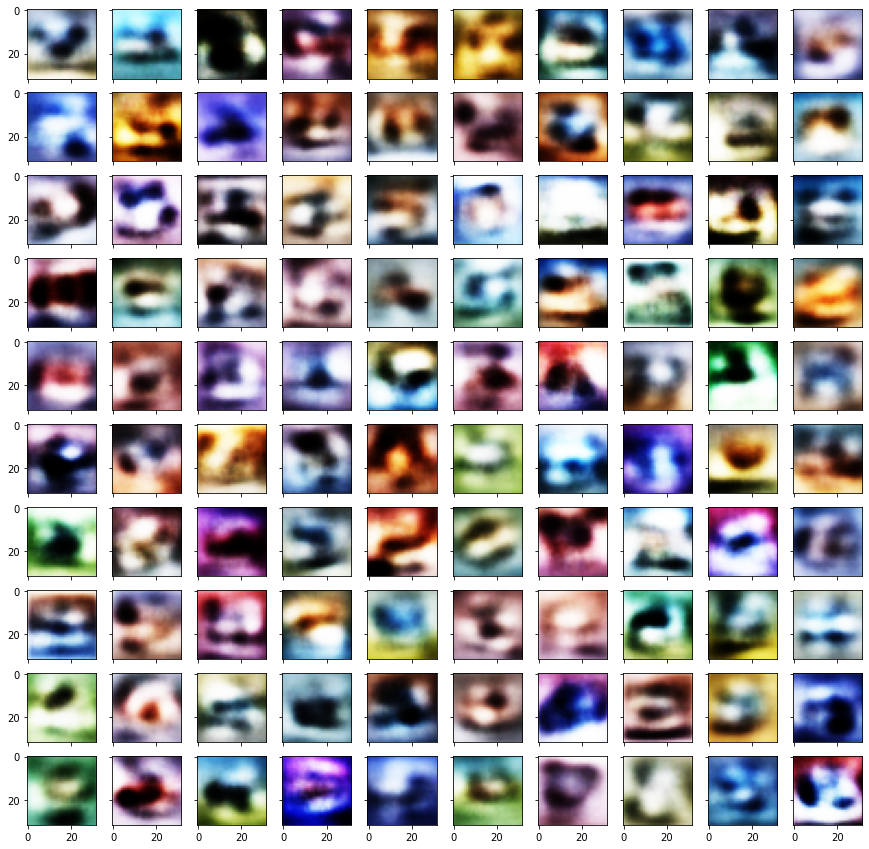

In [17]:
rows=10
cols=10
fig, ax = plt.subplots(rows, cols, figsize=(15,15), sharex='col', sharey='row')
counter=0
for i in range(rows*cols):
    q, mod = divmod(i,cols)
    if dataset_name == 'mnist':
        ax[q][mod].imshow(model.sample_img()[0][0], cmap='gray')
    else: # cifar10 dataset 
        img = model.sample_img().squeeze().permute([1,2,0]).numpy()*255
        img = img.astype(np.uint8)
        ax[q][mod].imshow(img)
plt.show()

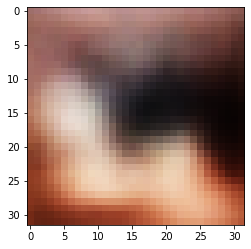

In [18]:
img = model.sample_img().squeeze().permute([1,2,0]).numpy()*255
img = img.astype(np.uint8)
plt.imshow(img)

In [10]:
# Grab the log likelihood values
load_epoch = 40
flow_lengths = [2, 10, 20, 40, 80]
recon_loss = []
kl_loss = []
var_bound = []

for nflow in flow_lengths:
    flows = [PlanarFlow(dim_z) for _ in range(nflow)]
    model = FlowVAE(img_size, dim_h, dim_z, decoder, flows)
    recon, kl = test(model, dataset_name, nflow, batch_size, load_epoch)
    recon_loss.append(recon)
    kl_loss.append(kl)
    var_bound.append(-1*(-kl + recon))

Files already downloaded and verified
Load Model from checkpoint/cifar10/2


100%|███████████████████████████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 15.89it/s]


Files already downloaded and verified
Load Model from checkpoint/cifar10/10


100%|███████████████████████████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 14.38it/s]


Files already downloaded and verified
Load Model from checkpoint/cifar10/20


100%|███████████████████████████████████████████████████████████████████████████████████| 40/40 [00:03<00:00, 12.79it/s]


Files already downloaded and verified
Load Model from checkpoint/cifar10/40


100%|███████████████████████████████████████████████████████████████████████████████████| 40/40 [00:03<00:00, 11.57it/s]


Files already downloaded and verified
Load Model from checkpoint/cifar10/80


100%|███████████████████████████████████████████████████████████████████████████████████| 40/40 [00:04<00:00,  9.18it/s]


In [11]:
# Plot function for Figure 4
def plot_line_graph_(x_val, y_val, title=None, x_label=None, y_label=None, vertical_arr=None):
    min_ = np.min(y_val)
    yratio = np.max(y_val) - np.min(y_val)
    if vertical_arr is not None:
        for i,x in enumerate(x_val):
            if len(vertical_arr) > i:
                ymin = (1.0 * (vertical_arr[i][0]-min_)/yratio)
                ymax = (1.0 * (vertical_arr[i][1]-min_)/yratio)
                # ymin and ymax is in percentage
                plt.axvline(x=x, ymin=ymin, ymax=ymax, linewidth=1, color='blue')
    plt.plot(x_val, y_val, marker='s')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)            

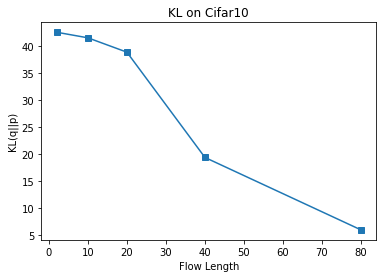

In [12]:
label = 'KL on Cifar10'
x_label = 'Flow Length'
y_label = 'KL(q||p)'

plot_line_graph_(flow_lengths, kl_loss, title=label, x_label=x_label, y_label=y_label)

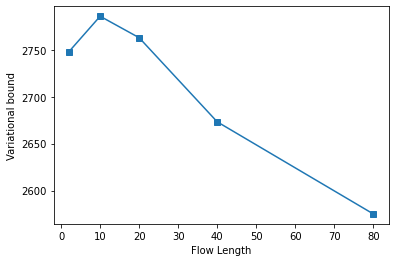

In [13]:
x_label = 'Flow Length'
y_label = 'Variational bound'

plot_line_graph_(flow_lengths, var_bound, x_label=x_label, y_label=y_label)

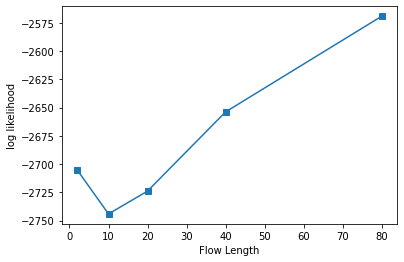

In [17]:
x_label = 'Flow Length'
y_label = 'log likelihood'

plot_line_graph_(flow_lengths, recon_loss, x_label=x_label, y_label=y_label)